#### 1. 과잉행동을 보이는 아동들은 상담을 통하여 혹은 약물요법 또는 둘 다에 의해 치료를 받는다. 다음의 자료는 이러한 치료방법들에 대한 유효성을 평가하기 위해 실험적으로 얻은 자료이다. 관찰된 종속변수는 해당 아동에게 주어진 일에 대한 집중시간(분)에 대한 측정치이다. 상담과 약물에 의한 치료 효과를 분석하여라.

| |약물치료|약물치료 않음|
|:--:|:--:|:--:|
|상담치료|14, 10, 13, 15, 15, 12, 10, 8 | 8,  6, 7, 4,  5, 10, 9, 11|
|상담치료 않음|11, 13, 12, 10, 14,  8, 15, 9|10, 13, 9, 6, 12,  9, 7, 13|

In [3]:
# Assigning Data

engaged_time <- c(14, 10, 13, 15, 15, 12, 10, 8, 8, 6, 7, 4, 5, 10, 9, 11,
                  11, 13, 12, 10, 14, 8, 15, 9, 10, 13, 9, 6, 12, 9, 7, 13)
drug <- gl(2, 8, 32, labels = list("Y", "N"))
counseling <- gl(2, 16, 32, labels = list("Y", "N"))

engaged_time.df <- data.frame(engaged_time, drug, counseling)

해당 실험은 과잉행동을 보이는 아동들에 대한 두 치료 요법인 상담과 약물에 의한 치료 효과를 아동들의 주어진 일에 대한 집중시간(분)을 측정함으로써 검증하고자 한다.이때 상담과 약물은 요인이 되며, 이에 대한 반응변수는 집중시간이다. 

해당 검정에 적절한 분석방법은 이원분산분석으로, 해당 실험의 경우 요인1(약물)과 요인2(상담)에 각각 2개의 처리그룹이 있으며, 이때 총 4개의 처리조합 내의 관찰값들은 분산이 같은 정규분포를 따르는 모집단에서 추출된 독립표본임을 가정한다. 

어느 요인 또는 요인 간의 상호작용이 유의적으로 반응변수인 '집중시간'에 영향을 미치는지 알아보기 위한 가설은 다음과 같이 설정할 수 있다.

> 1. H0: '약물'과 '상담'간의 상호작용은 없다. <br>
>    H1: not H0

> 2. H0: '약물'의 처리 집단별 평균차는 없다. <br>
>    H1: not H0

> 3. H0: '상담'의 처리 집단별 평균차는 없다. <br>
>    H1: not H0

두 치료요법에 의한 치료효과를 통계적으로 분석하기 위해 유의수준 5%에서 분산분석을 수행하고자 한다. 우선, 네 제곱합을 구하여 이원분산분석표를 작성하면 다음과 같다.

In [7]:
# Calculation
## Means
group.means <- aggregate(engaged_time ~ drug + counseling, data = engaged_time.df, mean) # x_ij_bar
matrix.means <- matrix(group.means$engaged_time, nrow = 2, ncol = 2)
obs.mean <- mean(engaged_time) # x_bar


## Sum of Squares
sst.time <- sum((engaged_time.df$engaged_time - obs.mean) ** 2)

sstr.drug <- 0
for (i in 1:2){
    sstr.drug <- 2 * 8 * (mean(matrix.means[i,]) - obs.mean) ** 2 + sstr.drug
}

sstr.counseling <- 0
for (i in 1:2){
    sstr.counseling <- 2 * 8 * (mean(matrix.means[,i]) - obs.mean) ** 2 + sstr.counseling
}

ssint.time <- 0
for (i in 1:2){
    for (j in 1:2){
        ssint.time = ssint.time + 8 * (matrix.means[i,j] - mean(matrix.means[i,]) - mean(matrix.means[,j]) + obs.mean) ** 2
    }
}

sse.time <- sst.time - sum(sstr.drug, sstr.counseling, ssint.time)

## Mean sum of squares
mstr.durg <- sstr.drug/(2-1)
mstr.counseling <- sstr.counseling/(2-1)
msint.time <- ssint.time/((2-1) * (2-1))
mse.time <- sse.time/(2*2*7)

## F.value
f_value.drug <- mstr.durg / mse.time
f_value.counseling <- mstr.counseling / mse.time
f_value.interaction <- msint.time / mse.time

|변동요인|자유도|제곱합|평균제곱합|F통계량|
|:--:|:--:|:--:|:--:|:--:|
|요인 1|1|78.12|78.12|12.170|
|요인 2|1|6.13|6.13|0.954|
|상호작용|1|18.00|18.00|2.804|
|오차|28|179.75|6.42||
|총계|31|282|||

이원분산분석에서는 두 요인 간 상호작용의 효과에 대한 유의성 검정을 먼저 수행해야 한다. 이때 유의성 검정을 위한 가설은 다음과 같다.

> 1. H0: '약물'과 '상담'간의 상호작용은 없다. <br>
>    H1: not H0

이원분산분석표에 따라 상호작용평균제곱합은 18.00이며, 상호작용에 대한 F통계량은 2.804이다. 자유도 1과 28을 가지는 F분포상에서 계산한 p값은 0.1052이다. 따라서 유의수준 5%하에서 귀무가설을 기각할 수 없다. 즉, 두 요인 간에는 상호작용이 존재하지 않는다고 볼 수 있다. (파란선이 기각역)

[1] 0.1051713

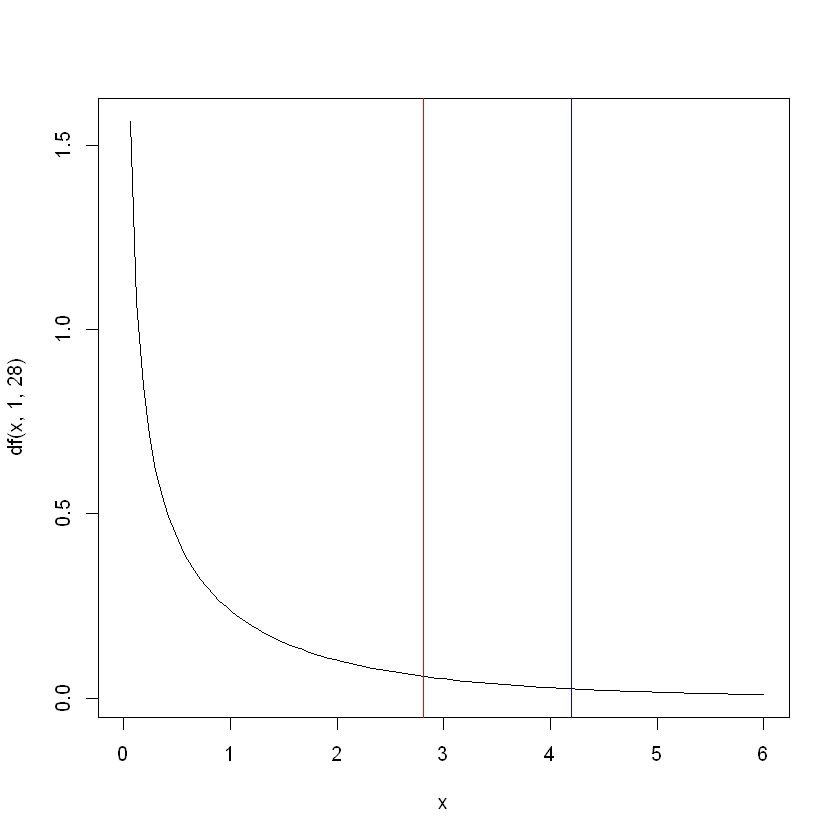

In [13]:
# P.value
(p_value.drug <- pf(f_value.interaction, 1, 28, lower.tail = F))

# Visualization
curve(df(x, 1, 28),  from = 0, to = 6)
abline(v = qf(0.95, 1, 28), col = "blue")
abline(v = f_value.interaction , col = "red")

다음으로 약물(요인1)의 치료효과에 대한 유의성 검정을 수행한다. 이때 유의성 검정을 위한 가설은 다음과 같다.

> 2. H0: '약물'의 처리 집단별 평균차는 없다. <br>
>    H1: not H0

이원분산분석표에 따라 처리 1 평균제곱합은 78.12이며, 상호작용에 대한 F통계량은 12.170이다. 자유도 1과 28을 가지는 F분포상에서 계산한 p값은 0.002이다. 따라서 유의수준 5%하에서 귀무가설은 기각된다. 즉, 약물 치료요법의 적용 여부에 따른 집단별 평균 집중 시간 간에는 유의한 차이가 있다. (파란선이 기각역)

[1] 0.001624279

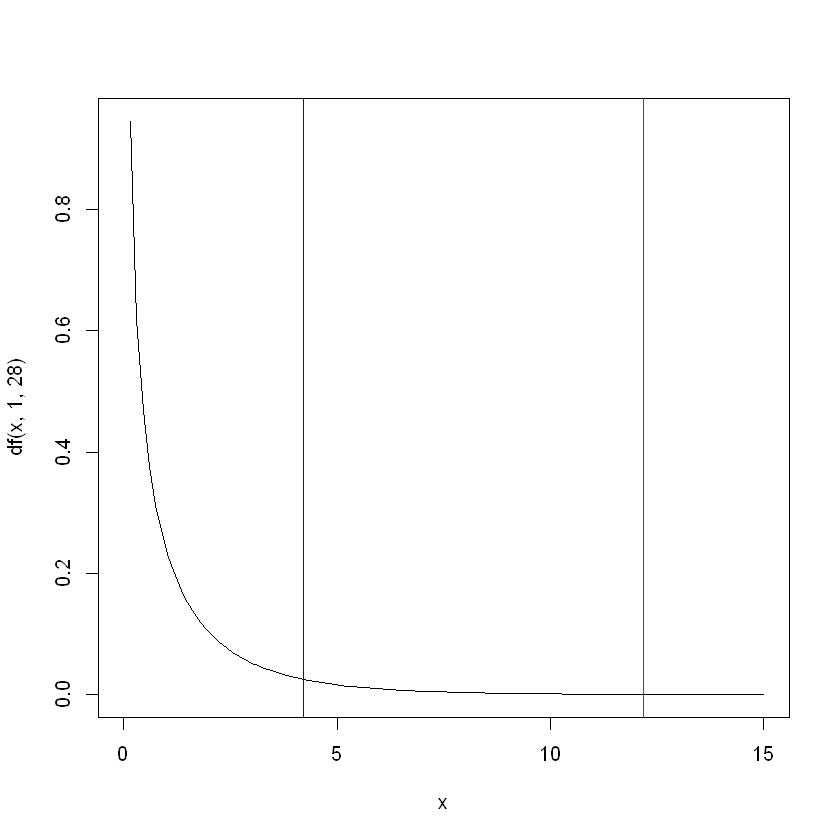

In [18]:
# P.value
(p_value.drug <- pf(f_value.drug, 1, 28, lower.tail = F))

# Visualization
curve(df(x, 1, 28),  from = 0, to = 15)
abline(v = qf(0.95, 1, 28), col = "blue")
abline(v = f_value.drug, col = "red")

마지막으로 상담(요인2)의 치료효과에 대한 유의성 검정을 수행한다. 이때 유의성 검정을 위한 가설은 다음과 같다.

> 3. H0: '상담'의 처리 집단별 평균차는 없다. <br>
>    H1: not H0

이원분산분석표에 따라 처리 2 평균제곱합은 6.13이며, 상호작용에 대한 F통계량은 0.954이다. 자유도 1과 28을 가지는 F분포상에서 계산한 p값은 0.3370이다. 따라서 유의수준 5%하에서 귀무가설을 기각할 수 없다. 즉, 상담 치료요법의 적용 여부에 따른 집단별 평균 집중 시간 간에는 유의한 차이가 없다고 볼 수 있다. (파란선이 기각역)

[1] 0.3370414

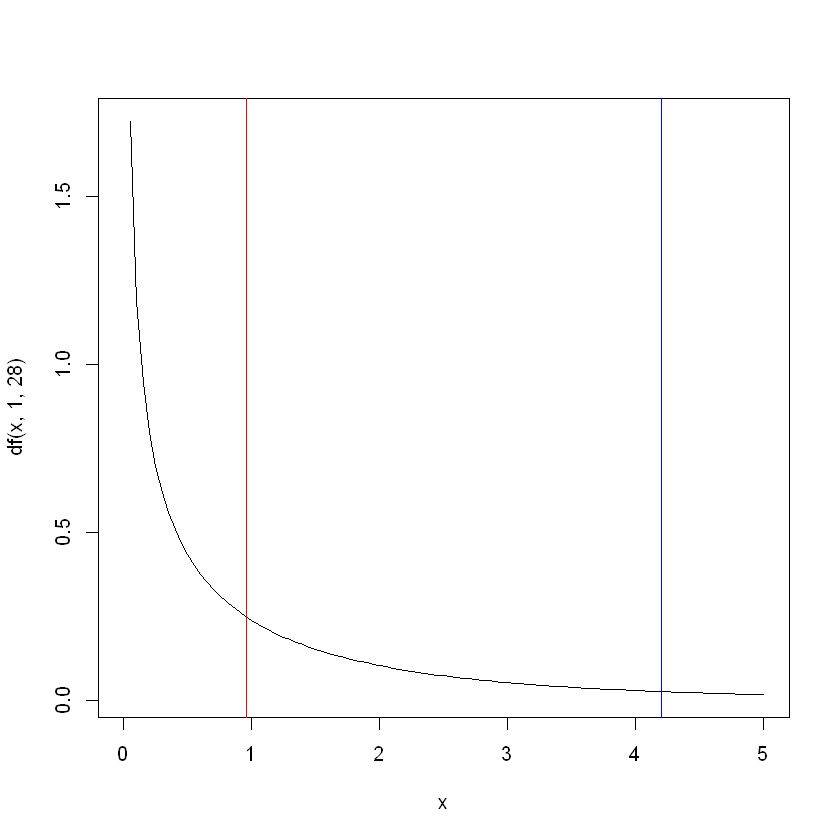

In [20]:
# P.value
(p_value.counseling <- pf(f_value.counseling, 1, 28, lower.tail = F))

# Visualization
curve(df(x, 1, 28),  from = 0, to = 5)
abline(v = qf(0.95, 1, 28), col = "blue")
abline(v = f_value.counseling, col = "red")

이원산분석 결과, 두 요인 간의 상호작용의 효과가 유의적이지 않았다. 이에 따라 '약물'과 '상담' 요인에 대한 주효과의 검증을 수행하였고, 그 결과 약물 치료요법의 경우 그 적용 여부에 따라 집단별 평균 집중시간에 유의한 차이가 있는 반면, 상담 치료요법의 경우에는 유의한 차이가 없음을 확인할 수 있었다. 따라서 약물치료는 과잉행동을 보이는 아동들의 집중시간을 늘리는 효과가 있는 반면, 상담치료는 그 효과가 미미하다는 결론을 내릴 수 있다. 

#### 2. 다음은 어느 작가의 글에서 각 단락별 어떤 특정 단어(예를 들면 ‘ 어머니’)가 나타난 수에 대한 분포이다. 그 작가의 글은 총 262개의 단락으로 이루어져 있다. 특정 단어 수에 대한 그래프를 그리고 포아송분포를 하는지 판단하여라.

|특정단어수|0|1|2|3|4|5|6|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|단락수|156|63|29|8|4|1|1|


해당 자료로부터 어느 작가의 글에서 각 단락별 어떤 특정 단어가 나타난 수가 포아송분포를 따른다고 가정하는 것이 적절한지 분석하기 위해선 적합도 검정을 수행하는 것이 적절하다. 적합도 검정을 수행하기 위한 가설은 다음과 같이 설정될 수 있다. 

> H0: 단락별 어떤 특정 단어가 나타난 수가 포아송분포를 따른다.<br>
> H1: 단락별 어떤 특정 단어가 나타난 수가 포아송분포를 따르지 않는다.

적합도 검정을 수행하기 위해서 우선 포아송분포 가정하에서 기대도수를 계산해야 한다. 이때 모수 $\lambda$가 주어지지 않았기 때문에 자료의 표본평균으로부터 $\lambda$를 추정할 수 있다. 추정치는 주어진 자료로부터 약 0.66으로 계산된다. 

In [20]:
# lambda
(lambda  <-  (0*156+1*63+2*29+3*8+4*4+5*1+6*1)/262)

[1] 0.6564885

따라서 추정된 $\lambda$를 대입한 포아송분포의 확률질량함수는 다음과 같다.
$$
f(x) = \frac{(0.66)^xe^{-(0.66)}}{x!}, x = 0,1, ... 
$$

이를 바탕으로 각 범주에 대한 기대빈도를 계산하면 다음과 같다.

|특정단어수|0|1|2|3|4|5|6|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|단락수|156|63|29|8|4|1|1|
|기대빈도|135.89|89.21|29.28|6.41|1.05|0.14|0.02|

In [21]:
# expected frequency
round(exp <- 262 * dpois(c(0:6), lambda),2)

[1] 135.89  89.21  29.28   6.41   1.05   0.14   0.02

이때,이산형변수인 범주형 자료를 연속형분포인 카이제곱분포를 근사적으로 이용한 적합도 검정은 각 범주의 기대빈도가 5보다 작은 경우에는 잘 맞지 않는다. 따라서 기대빈도가 5 미만인 범주는 합하여 다음과 같은 붕괴된(collapsed) 도수분포표를 만들 수 있다.

|특정단어수|0|1|2|3이상|합계|
|:-:|:-:|:-:|:-:|:-:|:-:|
|단락수|156|63|29|14|1|
|기대빈도|135.89|89.21|29.28|7.62|262|

In [22]:
# collapsing
obs <- c(156, 63, 29, 14)
exp[4] <- sum(exp[4:7])
exp <- exp[1:4]

관찰된 단락수가 기대빈도와 차이가 많이 날수록 관찰자료가 포아송분포에서 얻어진 것이 아니라는 증거가 된다. 이때 두 차이에 대한 검정통계량은 카이제곱통계량으로 계산되며, 이 경우 카이제곱값은 16.0381이다.

In [23]:
# test statistic
(chisq <- sum((obs - exp)^2 / exp))

[1] 16.03814

앞서 모수 $\lambda$를 추정했기 때문에 카이제곱 적합도 검정의 자유도는 2가 된다. 따라서 자유도 2인 카이제곱분포에서 p값을 구하면 0.0003이다. 따라서 유의수준 5%하에서 귀무가설은 기각된다.(파란선이 기각역) 즉, 단락별 어떤 특정 단어가 나타난 수가 포아송분포를 따른다고 보기 어렵다.

[1] 0.0003291267

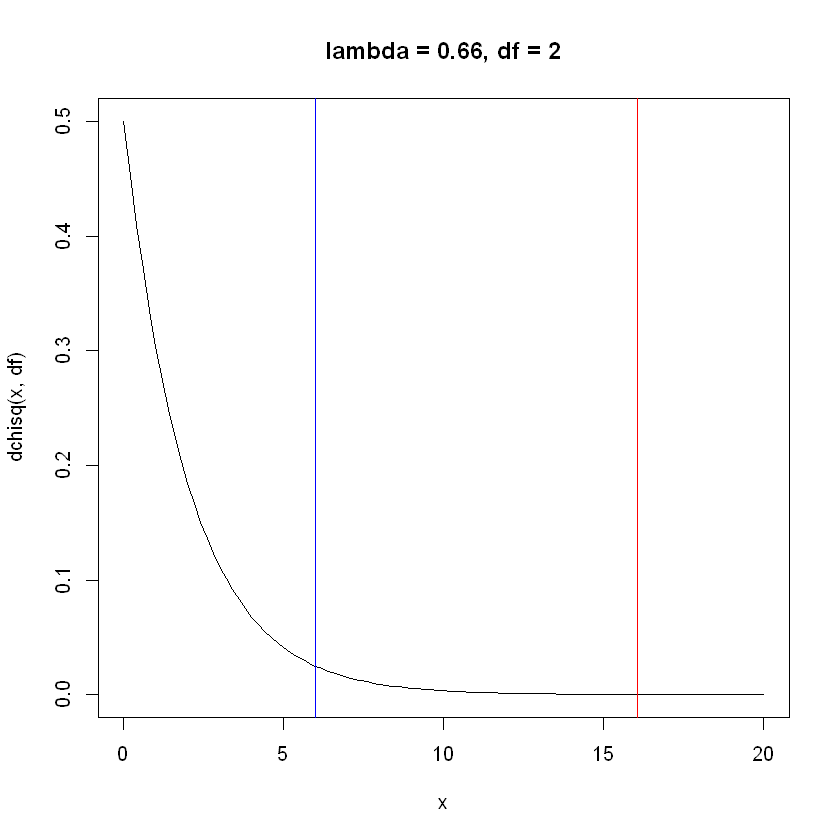

In [24]:
# p value
df <- length(obs) - 1 - 1
(p_value <- pchisq(chisq, df, lower.tail = F))

## visualization
curve(dchisq(x, df), to = 20, main = "lambda = 0.66, df = 2")
    abline(v = chisq, col = "red")
    abline(v = qchisq(0.95, df), col = "blue")

#### 3. 음주운전 시 반응이 얼마나 느려지는지 알아보기 위해 18명의 운전자들에게 각각 맥주 2병을 마시게 하여 음주 전후의 반응시간(초)을 측정하였다. 음주 후 반응시간이 느려지는가? 그래프를 그려보아라. 적절한 분석 방법을 적용하고 분석하여라. 사용한 방법에서의 가정 사항은 무엇이고 그 타당성을 담보할 수 있는가?

In [32]:
# assigning data
response <- c(0.88, 0.76, 0.67, 0.78, 0.77, 0.56, 0.67, 0.65, 0.86, 
              0.85, 0.85, 0.77, 0.75, 0.65, 0.67, 0.67, 0.98, 0.87,
              0.89, 0.86, 0.87, 0.80, 0.94, 0.75, 0.77, 0.75, 0.86,
              0.88, 0.87, 0.88, 0.87, 0.76, 0.79, 0.77, 0.85, 0.87)
drink <- gl(2, 18, 36, labels = list("음주전", "음주후"))
driver <- gl(18, 1, 36, labels = list("1", "2", "3", "4", "5",
                                      "6", "7", "8", "9", "10",
                                      "11", "12", "13", "14", "15",
                                      "16", "17", "18"))
df <- data.frame(response, drink, driver)

다음은 운전자 18명의 음주 여부에 따른 반응시간을 나타낸 그래프이다. 

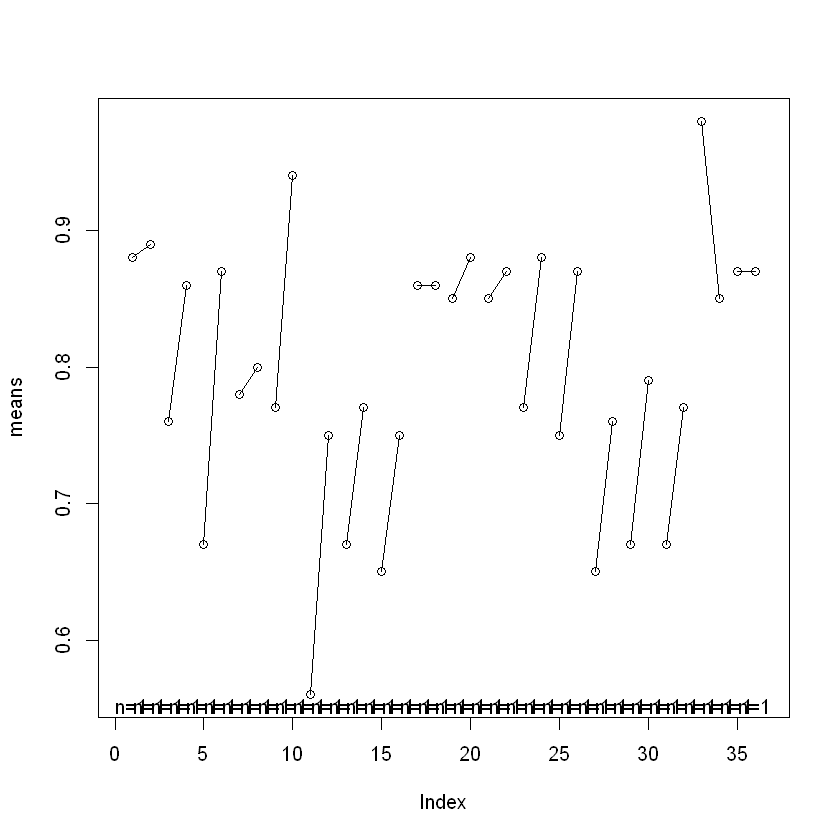

In [34]:
# visualization
library(gplots)
plotmeans(response ~ interaction(drink, driver), data = df, bars = F,
          connect = list(1:2, 3:4, 5:6, 7:8, 9:10, 11:12, 13:14, 15:16, 17:18,
                        19:20, 21:22, 23:24, 25:26, 27:28, 29:30, 31:32, 33:34, 35:36))

그래프를 통해 각 운전자들의 반응시간은 음주여부에 따라서도 달라지지만, 18명의 운전자들 사이에 기본적인 반응시간의 차이가 있음을 확인할 수 있다. 음주여부에 의한 반응시간의 차이보다 각 운전자의 특성에 따른 반응시간의 차이가 더 크게 되면 실험을 통해 유의한 결과를 얻지 못할 수도 있다. 

따라서 이 경우 운전자들 간의 특성 차이에 따른 변동을 제어하기 위해 18명의 운전자들은 블록으로 정의하여 확률화블록설계하에서의 분산분석을 수행하는 것이 적합하다. 우선 음주여부에 따른 반응시간의 차이가 존재하는지 검정하기 위한 가설은 다음과 같다.($\mu_{1}$ = 음주전 반응시간의 평균, $\mu_{2}$ = 음주후 반응시간의 평균)

> H0: $\mu_{1}$ = $\mu_{2}$ <br>
> H1: not H0

유의수준 5%하에서 확률화블록설계하에서의 분산분석을 수행하고자 한다. 우선, 처리, 블록, 오차에 대한 제곱합을 구하여 분산분석표를 작성하면 다음과 같다.

In [37]:
# randomized block design
block <- driver
summary(aov(response ~ drink + block, data = df))

# Calculataion
## Means 
response.mean <- mean(response)
drink.means <- as.vector((aggregate(response ~ drink, data = df, mean))$response)
block.means <- as.vector((aggregate(response ~ block, data = df, mean))$response)  

## Sum of Squares
sstr <- 0
for (i in 1:2){
    sstr <- 18 * (drink.means[i] - response.mean) ** 2 + sstr
}


ssb <- 0
for (i in 1:18){
    ssb <- 2 * (block.means[i] - response.mean) ** 2 + ssb
}

sst.response <- sum((response - response.mean) ** 2)
sse <- sst.response - sum(sstr, ssb)

## Mean sum of squares
### k = 2, b = 18
mstr <- sstr / 1
msb <- ssb / 17
mse <- sse / 17

            Df  Sum Sq Mean Sq F value   Pr(>F)    
drink        1 0.05214 0.05214   15.77 0.000988 ***
block       17 0.19841 0.01167    3.53 0.006474 ** 
Residuals   17 0.05621 0.00331                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

|변동요인|자유도|제곱합|평균제곱합|F통계량|
|:--:|:--:|:--:|:--:|:--:|
|처리|1|0.052|0.052|15.77|
|블록|17|0.198|0.012||
|오차|17|0.056|0.003||
|총계|35|0.056|||


분산분석표에 따라 처리평균제곱합은 0.052이며, F통계량은 15.77이다. 자유도 1과 17을 가지는 F분포상에서 계산한 p값은 0.001이다. 따라서 유의수준 5%하에서 귀무가설은 기각된다. 즉, 음주 전과 후에 반응시간 달라진다고 볼 수 있다. 이때, 음주전 반응시간의 평균은 0.759, 음주후 반응시간의 평균은 0.835이므로 음주 후에 반응시간이 느려졌다는 결론을 내릴 수 있다. (파란선이 기각역)

In [46]:
# comparison
(drink.means <- as.vector((aggregate(response ~ drink, data = df, mean))$response))

[1] 0.7588889 0.8350000

[1] 0.000987895

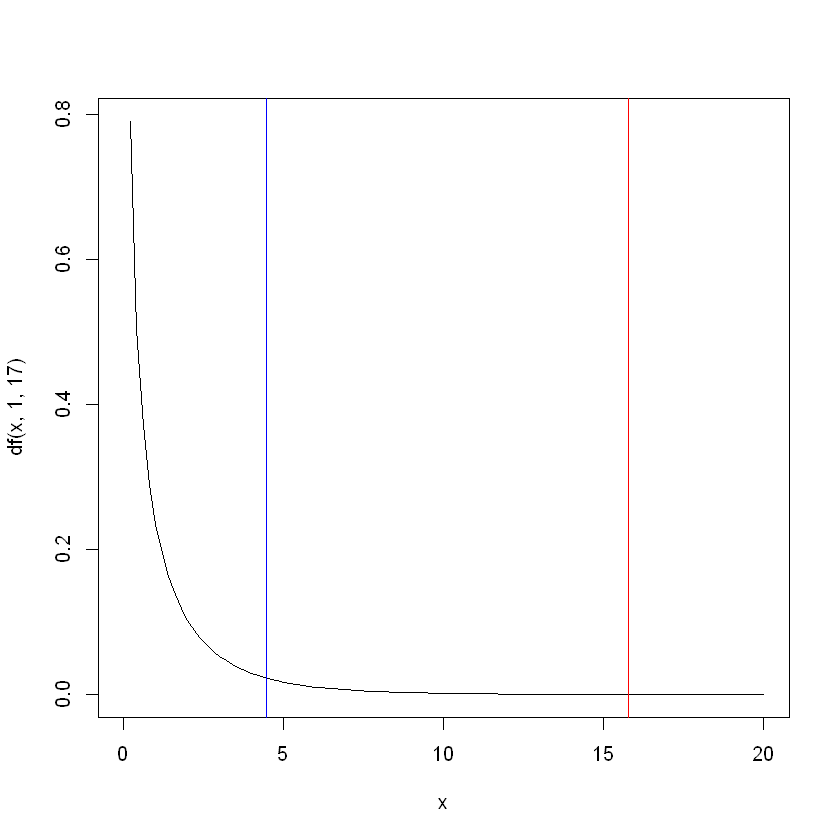

In [43]:
# p value
f_value <- mstr / mse
(p_value <- pf(f_value, 1, 17, lower.tail = F))

# Visualization
curve(df(x, 1, 17),  from = 0, to = 20)
abline(v = qf(0.95, 1, 17), col = "blue")
abline(v = f_value, col = "red")

이때 블록별(운전자별) 평균 간의 차이가 있다는 것은 이미 가정된 바이므로 F통계량값을 구하여 검정하지 않는다. 단, 블록별 평균 간의 차이가 유의한지 검정하기 위해 F통계량 = MSB/MSE을 계산하고, 17, 17의 자유도를 가지는 F분포에서 p값을 구하면 다음과 같다.

In [45]:
# block
f_value.block <- msb / mse
(p_value <- pf(f_value.block, 17, 17, lower.tail = F))

[1] 0.006474023

p값은 0.007이므로, 유의수준 5%하에서 블록별로 평균은 유의한 차이가 없다는 귀무가설은 기각된다. 

#### 16-14. 가슴통증이 있는 371명의 혈장 콜레스테롤과 고증성지방혈증(트라이글리세라이드, triglyceride)의 농도(단위 mg/dl)를 조사하였다. 51명은 심장병 증세가 없었고, 320명은 대동맥이 가늘어져 있었다. 심장병 여부를 콜레스테롤과 지방혈증의 로지스틱회귀선으로 추정하고 결과를 요약하여라. 